# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [6]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

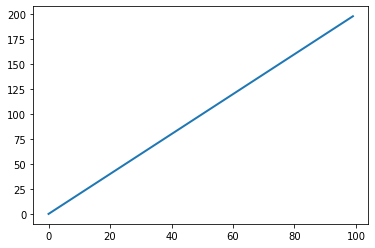

In [18]:
plt.plot(x, y, '-', linewidth=2)

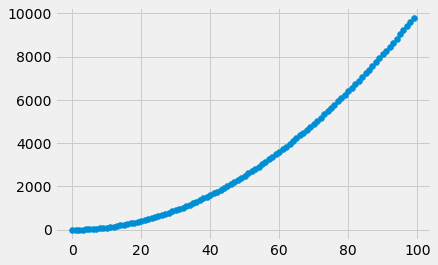

In [23]:
plt.scatter(x, z)
plt.style.use('Solarize_Light2')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

[(0.0, 100.0), Text(0.5, 0, 'X'), Text(0, 0.5, 'Z'), Text(0.5, 1.0, 'Z=X²')]

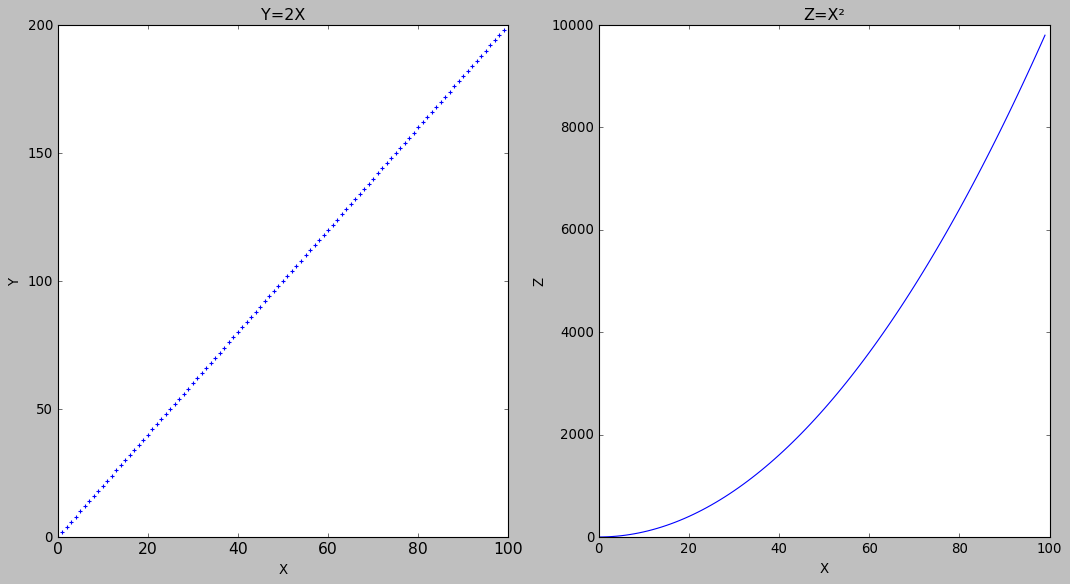

In [10]:
# Method 2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plt.style.use('classic')
plt.setp(ax[0].get_xticklabels(), fontsize=14)
ax[0].scatter(x,y,marker='+')
ax[0].set_title('Y=2X')
ax[1].plot(x,z,'-')
ax[1].set_title('Z=X²')
ax[0].set(xlim=[0, 100], 
          ylim=[0, 200], 
       xlabel='X', 
       ylabel='Y',
       title='Y=2X')
ax[1].set(xlim=[0, 100], 
       xlabel='X', 
       ylabel='Z',
       title='Z=X²')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

[(0.0, 100.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y2'),
 Text(0.5, 1.0, 'y2=e^x'),
 None]

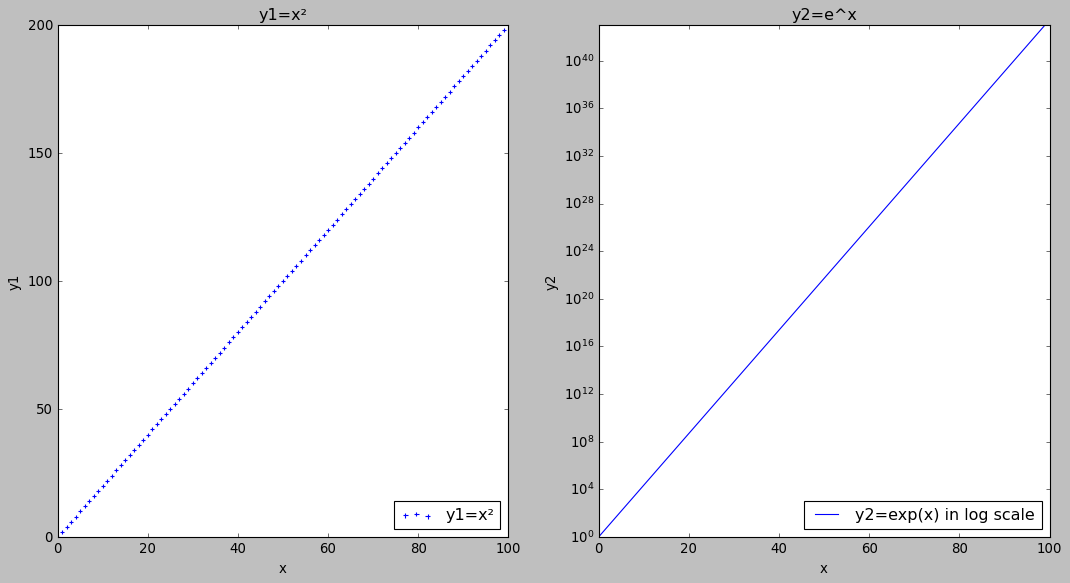

In [33]:
y1 = x*2
y2= np.exp(x)

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plt.style.use('classic')
ax2[0].scatter(x,y1,marker='+',label='y1=x²')
ax2[0].set_title('Y=x²')
ax2[1].plot(x,y2,'-',label='y2=exp(x) in log scale')
ax2[0].legend(loc='lower right')
ax2[1].legend(loc='lower right')
ax2[0].set(xlim=[0, 100], 
          ylim=[0, 200], 
       xlabel='x', 
       ylabel='y1',
       title='y1=x²')
ax2[1].set(xlim=[0, 100], 
       xlabel='x', 
       ylabel='y2',
       title='y2=e^x',
        yscale='log')

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [35]:
import pandas as pd

fb2=pd.read_csv('../data/fitbit2.csv')

In [36]:
fb2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [54]:
avg_steps_month=fb2[['Steps','Months']].groupby('Months').mean()

avg_steps_wk_or_wkend=fb2[['Steps','Work_or_Weekend']].groupby('Work_or_Weekend').mean()
avg_steps_wk_or_wkend['Work_or_Weekend']=['Weekend','Work']
avg_steps_wk_or_wkend.set_index('Work_or_Weekend')

,Steps
Work_or_Weekend,
Weekend,10064.238095
Work,10144.572519


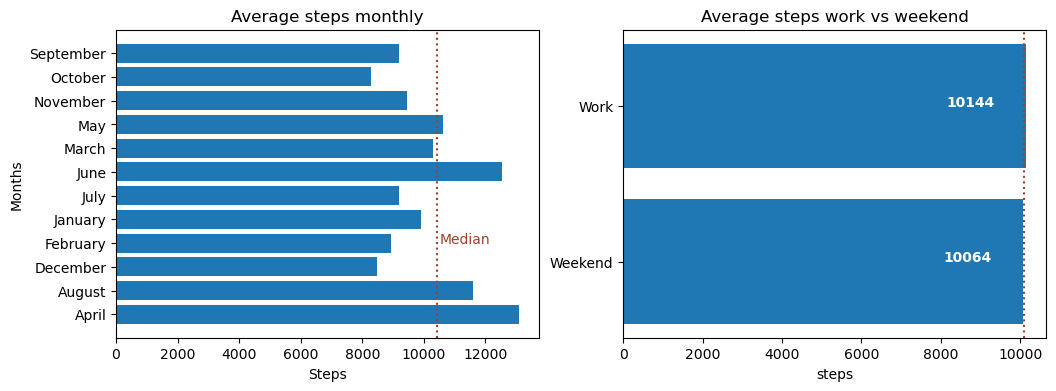

In [109]:
figfb, axfb = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plt.style.use('fast')
axfb[0].barh(avg_steps_month.index,avg_steps_month.Steps)
axfb[0].set_title('Average steps monthly')
axfb[0].set(xlabel='Steps', 
       ylabel='Months')
axfb[0].axvline(fb2['Steps'].median(), ls=':', color='#a2402b')
axfb[0].text(10500, 3, 'Median', color='#a2402b')

axfb[1].barh(['Weekend','Work'],avg_steps_wk_or_wkend.Steps)
axfb[1].set(xlabel='steps',
       title='Average steps work vs weekend',)
axfb[1].axvline(avg_steps_wk_or_wkend.Steps.mean(), ls=':', color='#a2402b')
for i, v in enumerate(avg_steps_wk_or_wkend.Steps):
    axfb[1].text(v-2000 , i, str(int(v)), color='white', fontweight='bold')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

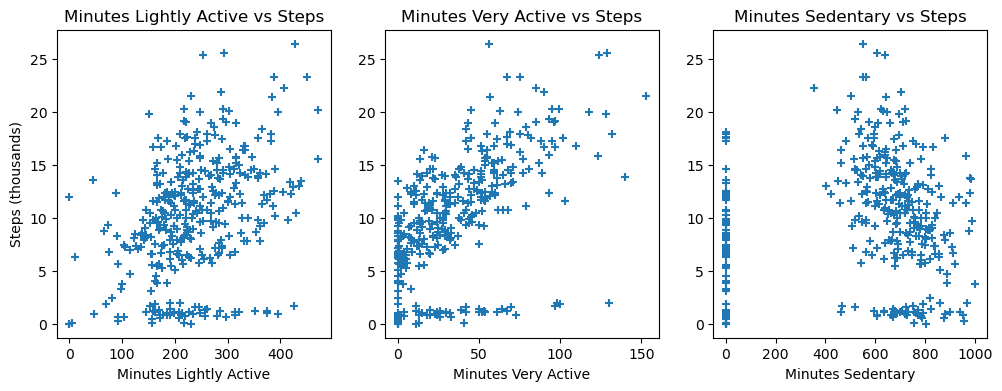

In [102]:
df=fb2[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary' ]]
figfb2, axfb2 = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i in range(len(axfb2)):
    axfb2[i].scatter(df[df.columns[i+1]],df['Steps']/1000,marker='+')
    axfb2[i].set_title(df.columns[i+1] + ' vs Steps' )
    axfb2[i].set(xlabel=df.columns[i+1])
    axfb2[0].set(ylabel='Steps (thousands)')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [77]:
import pandas as pd

titanic=pd.read_csv('../data/titanic.csv', index_col='PassengerId')

#### Explore the titanic dataset using Pandas dtypes.

In [78]:
titanic.dtypes

Survived    float64
Pclass        int64
Name         object
Gender       object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [79]:
titanic.select_dtypes('number')

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.0,3,22.000000,1,0,7.2500
2,1.0,1,38.000000,1,0,71.2833
3,1.0,3,26.000000,0,0,7.9250
4,1.0,1,35.000000,1,0,53.1000
5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
1305,NaN,3,29.513190,0,0,8.0500
1306,NaN,1,39.000000,0,0,108.9000
1307,NaN,3,38.500000,0,0,7.2500


In [85]:
# titanic.select_dtypes('category')   doesn't return any column so we have to change some columns to categories

titanic[['Survived', 'Pclass', 'Gender','SibSp','Parch','Embarked']]= titanic[['Survived', 'Pclass', 'Gender','SibSp','Parch','Embarked']].apply(lambda x: x.astype('category'))
titanic.dtypes
titanic.select_dtypes('category') 

,Survived,Pclass,Gender,SibSp,Parch,Embarked
PassengerId,,,,,,
1,0.0,3,male,1,0,S
2,1.0,1,female,1,0,C
3,1.0,3,female,0,0,S
4,1.0,1,female,1,0,S
5,0.0,3,male,0,0,S
...,...,...,...,...,...,...
1305,NaN,3,male,0,0,S
1306,NaN,1,female,0,0,C
1307,NaN,3,male,0,0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

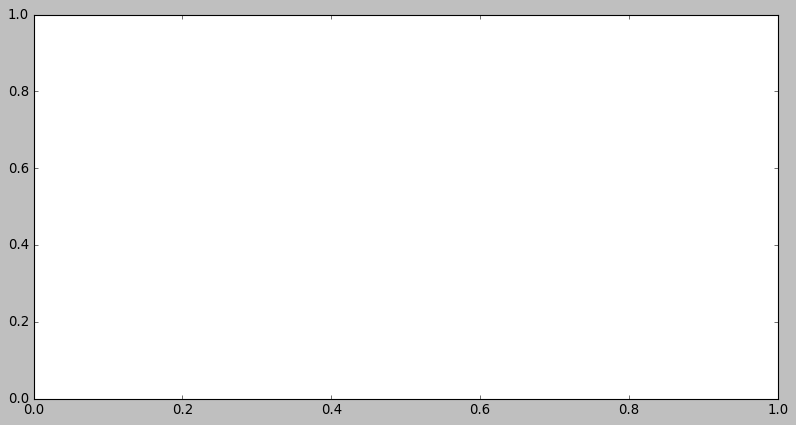

In [86]:
fig3, ax3 = plt.subplots(figsize=(12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

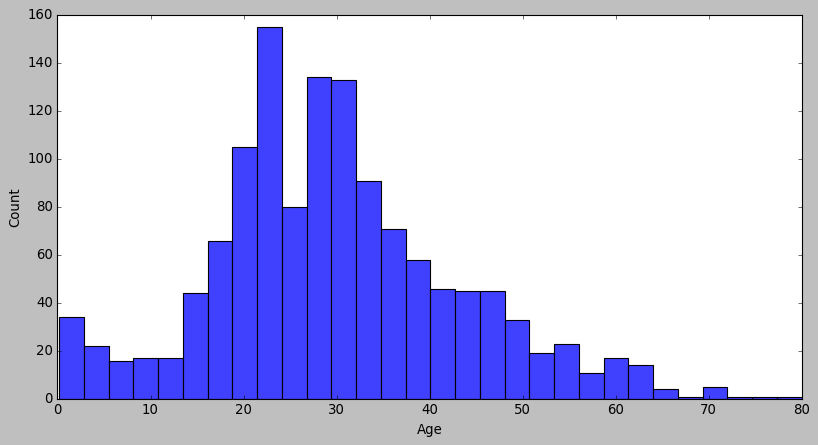

In [87]:
sns.histplot(data=titanic, x='Age', ax=ax3)
fig3

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

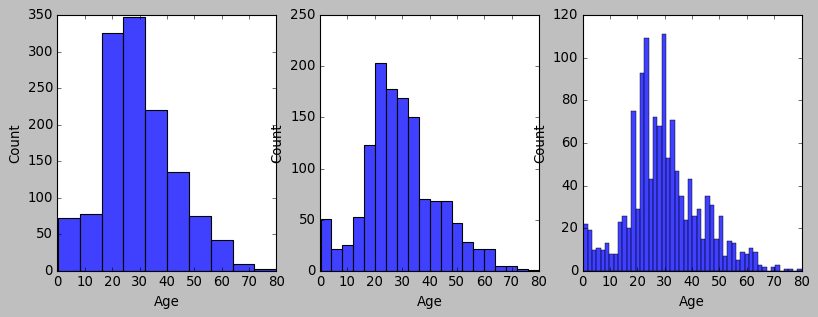

In [88]:
fig4, ax4 = plt.subplots(figsize=(12,4), ncols=3)
bins=[10,20,50]

for i in range(len(bins)):
    sns.histplot(data=titanic, x='Age', ax=ax4[i], bins=bins[i])


#### How does the bin size affect your plot?

In [ ]:
# The number of bins defines the number of sets/groups to plot the data. More bins means more groups, reducing averaging

#### Use seaborn to show the distribution of column `Age`.

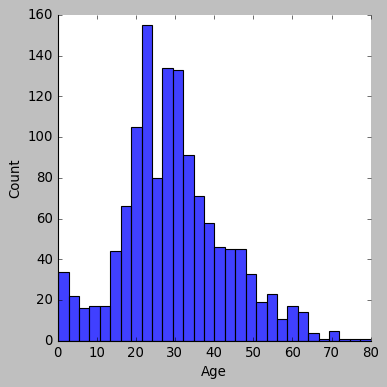

In [89]:
sns.displot(data=titanic, x='Age')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

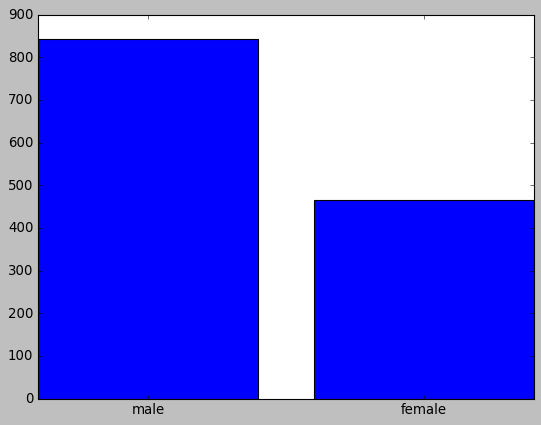

In [90]:
# Method 1 - matplotlib
a=titanic.value_counts('Gender')
plt.bar(a.index, a.values)

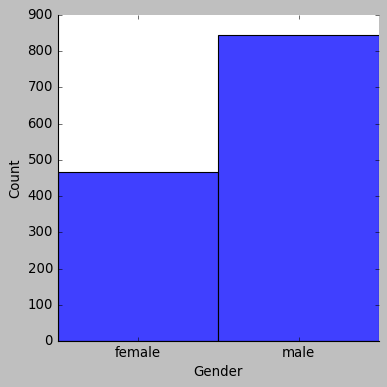

In [91]:
# Method 2 - seaborn
sns.displot(data=titanic, x='Gender')

#### Use the right plot to visualize the column `Pclass`.

<BarContainer object of 3 artists>

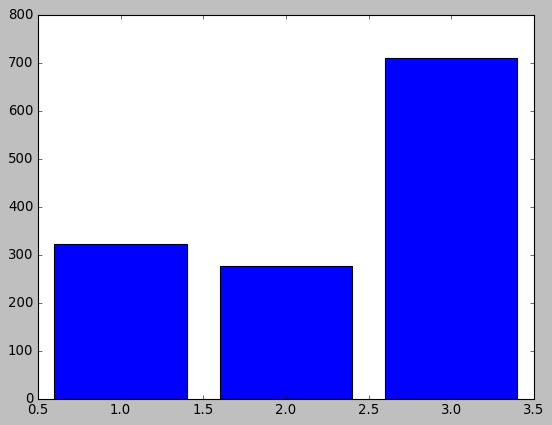

In [92]:
b=titanic.value_counts('Pclass').sort_index()
b.dtypes
plt.bar(b.index, b.values)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age', ylabel='Gender'>

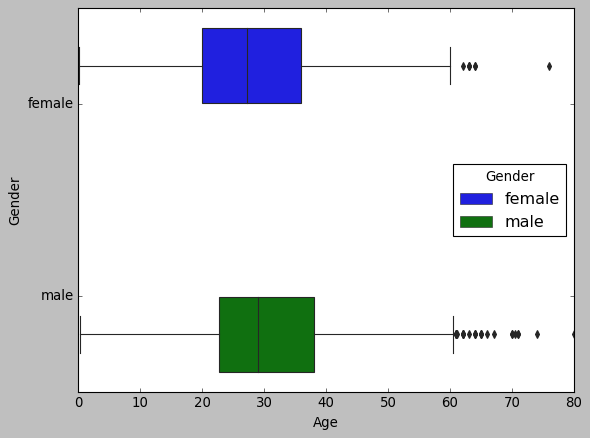

In [93]:
sns.boxplot(data=titanic, x='Age', y='Gender', hue='Gender')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

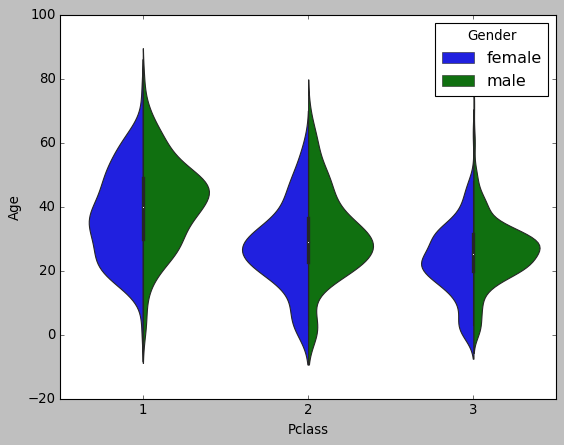

In [94]:
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Gender', split=True)

In [ ]:
# We can either use a box plot or violin plot to show quartiles, median and outliers or the distribution.

#### What does the last plot tell you about the feature `Age`?

In [ ]:
# From the boxplot: 
# The women are slightly younger than the mean (lower median)
# There are more male outliers (older)


# From the violinplot:
# The people in the first class are mostly older than the people in 2nd and 3rd class.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

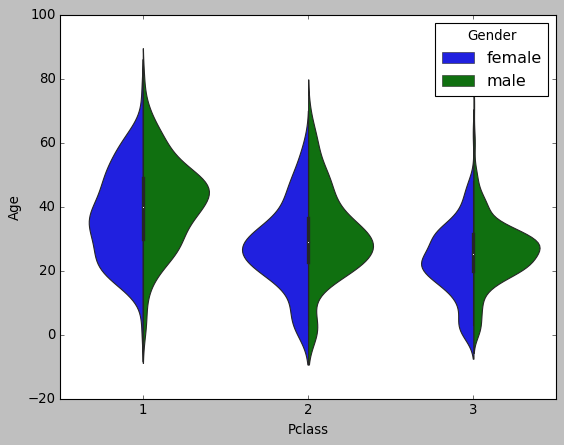

In [95]:
#The violinplot
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Gender', split=True)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
# From the violinplot:
# The people in the first class are mostly older than the people in 2nd and 3rd class.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

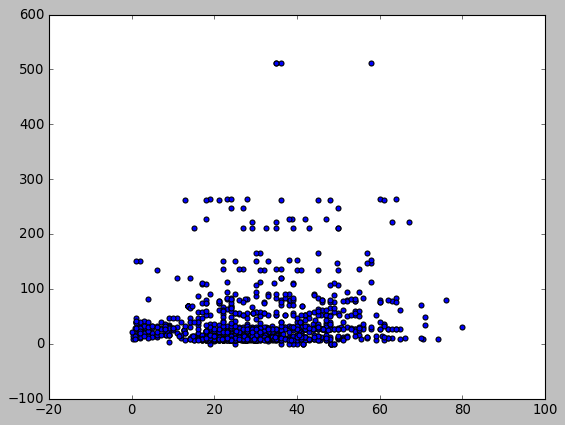

In [96]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Age, y=titanic.Fare)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

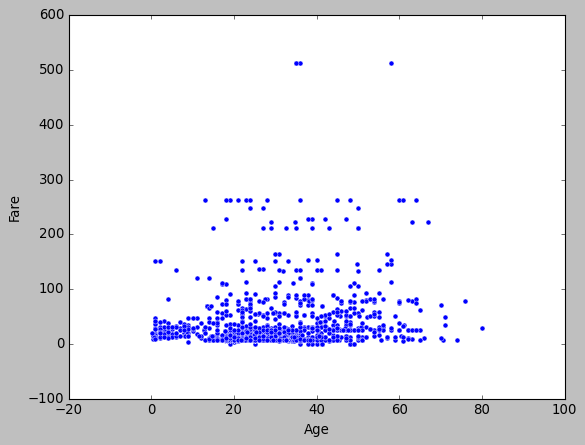

In [97]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare')

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

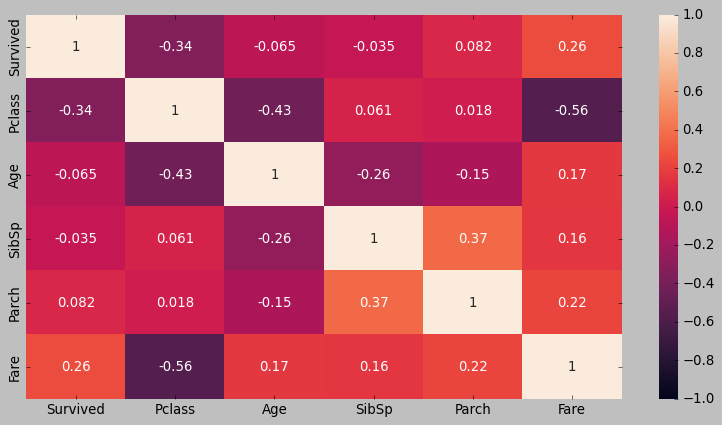

In [99]:
titanic=pd.read_csv('../data/titanic.csv', index_col='PassengerId')
corr=titanic.corr()

fig5, ax5 = plt.subplots(figsize=(12,6))
sns.heatmap(corr, vmin=-1, vmax=1, annot = True, ax=ax5)

#### What are the most correlated features?

In [84]:
# The values are not highly correlated. The max correlation values are:

# Fare and Pclass with negative correlation.
# Parch with SibSp with positive correlation.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

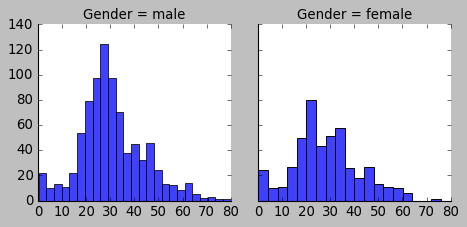

In [107]:
g= sns.FacetGrid(data=titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age")